In [1]:
# specify id
y_id = 2
track_id = 2
server = 4

In [10]:
# import module
import sys
sys.path.insert(0, '../')
from utils.training_utils import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# load datas
test_x, train_x, train_y = load_data(y_id)
print(test_x.shape, train_x.shape, train_y.shape)

(2500, 10000) (47500, 10000) (47500,)


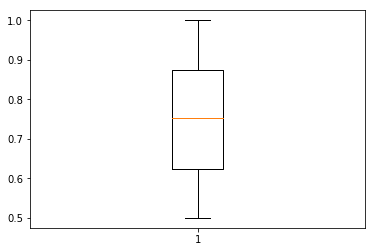

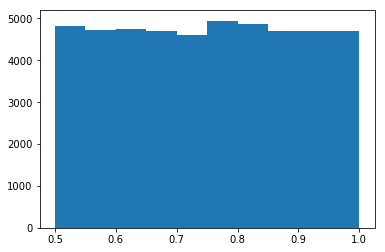

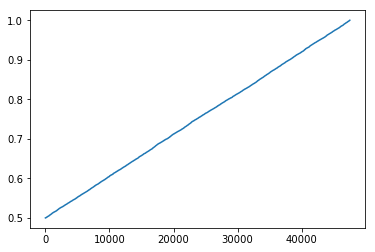

[0.80366996 0.59863587 0.6035146  ... 0.71932249 0.54472429 0.51776807]


,0
count,47500.000000
mean,0.749719
std,0.143919
min,0.500035
25%,0.624887
50%,0.751707
75%,0.873909
max,0.999896


In [11]:
# draw distribution of y2
plt.boxplot(train_y)
plt.show()
plt.hist(train_y)
plt.show()
x = sorted(train_y)
plt.plot(x)
plt.show()
print(train_y)
d = pd.DataFrame(train_y)
d.describe()

In [4]:
# pick only important data
idx = []
with open('../29/adaboost' + str(y_id) + '_feature.csv', 'r') as f:
    i = 0
    for lines in f:
        importance = float(lines.replace('\n', '').split(',')[y_id])
        if(np.abs(importance) > 1e-9):
            idx.append(i)
        i += 1
train_x = train_x[:, idx]
test_x = test_x[:, idx]
print(train_x.shape)

(47500, 565)


In [3]:
# specify parameters
params = {
    'booster': ['gbtree', 'dart'],
    'n_estimators': [50, 100, 500],
    'max_depth': [3, 6],
    'subsample': [0.25, 0.5, 0.75],
    'learning_rate': [0.1, 0.05, 0.01], 
    'tree_method': ['hist', 'auto']
}
params_test = {
    'booster': ['dart'],
    'n_estimators': [500],
    'max_depth': [9],
    'subsample': [0.75, 0.5],
    'learning_rate': [0.1], 
    'tree_method': ['hist', 'auto']
}

In [5]:
# define my own scorer
from sklearn.metrics import make_scorer

def scorer(y, y_pred):
    return -np.sum(np.abs(y - y_pred) / y) / len(y)

In [11]:
print(err2_calc(model.predict(train_x), train_y))

0.005157021354906248


In [12]:
print(model.best_estimator_)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=8,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.75, tree_method='hist', verbosity=2)


In [8]:
model = GridSearchCV(estimator=XGBRegressor(verbosity=2, n_jobs=8), 
                     param_grid=params_test, 
                     scoring=make_scorer(scorer),
                     cv=3,
                     verbose=20,
                     n_jobs=4,
                     return_train_score=True)

In [10]:
model.fit(train_x, train_y)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  9.9min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed: 13.9min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed: 15.2min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed: 16.7min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 19.7min
[Parallel(n_jobs=4)]: Done   6 out of  12 | elapsed: 23.7min remaining: 23.7min
[Parallel(n_jobs=4)]: Done   7 out of  12 | elapsed: 30.4min remaining: 21.7min
[Parallel(n_jobs=4)]: Done   8 out of  12 | elapsed: 32.2min remaining: 16.1min
[Parallel(n_jobs=4)]: Done   9 out of  12 | elapsed: 32.4min remaining: 10.8min
[Parallel(n_jobs=4)]: Done  10 out of  12 | elapsed: 33.9min remaining:  6.8min
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 38.7min remaining:    0.0s
[Parallel(n_jobs=4)]: Done  12 out of  12 | elapsed: 38.7min finished
/home/student/07/b07902047/python-packages/xgboost/lib/python3.7/site-

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=8,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1, verbosity=2),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'booster': ['dart'], 'n_estimators': [500], 'max_depth': [9], 'subsample': [0.75, 0.5], 'learning_rate': [0.1], 'tree_method': ['hist', 'auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(scorer), verbose=20)

In [16]:
# write files
write_prediction('train_y' + str(y_id) + '_' + str(track_id) + '.txt', 'w', model.predict(train_x).reshape((47500, 1)).astype('str'))
write_prediction('test_y' + str(y_id) + '_' + str(track_id) + '.txt', 'w', model.predict(test_x).reshape((2500, 1)).astype('str'))

In [11]:
print(err1_calc(model.predict(train_x), train_y, y_id))

0.16900158048345704


In [12]:
print(err2_calc(model.predict(train_x), train_y))

0.0007744558685535031


In [13]:
print(model.best_estimator_)

XGBRegressor(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=8,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.75, tree_method='hist', verbosity=2)


In [14]:
print(model.best_score_)

-0.008907696334256731
